# Exercício: Limpeza de Dados

Dados retirados de: https://www.kaggle.com/competitions/sberbank-russian-housing-market

In [ ]:
!wget https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=0
!mv housing_market.csv?dl=0 housing_market.csv

--2022-04-11 19:24:33--  https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0bl91ufgvfarhjh/housing_market.csv [following]
--2022-04-11 19:24:33--  https://www.dropbox.com/s/raw/0bl91ufgvfarhjh/housing_market.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc522ce6ec04ad19dcea1eb98f1c.dl.dropboxusercontent.com/cd/0/inline/BjMKoboeaTvYQRBNc8_o4-y8qXIfCJvTa2yagOhp_EtQHuMa4XxQJo_TJgvn2uyjsG_hkNkoLdQmBcJfc4tjjoxDqCkxBD4aPH7i5ywl5ep9piMmSikTUa_eD9G0GQk8QVKJ4z7CE8ls8b6Y0flgzDd5JNbPMxeifXblgS4r-jBLUw/file# [following]
--2022-04-11 19:24:33--  https://uc522ce6ec04ad19dcea1eb98f1c.dl.dropboxusercontent.com/cd/0/inline/BjMKoboeaTvYQRBNc8_o4-y8qXIfCJvTa2yagOhp_EtQ

In [ ]:
# Tríade de bibliotecas de ciência de dados
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)

O objetivo da base de dados que estamos utilizando é inferir a coluna `price_doc`, indicando o preço de uma propriedade. As outras colunas são atributos da propriedade (ex: `full_sq`: área em metros quadrados) ou da vizinhança (ex: `market_shop_km` distância até o mercado mais próximo).

Recomendo checar o dicionário completo de dados: https://www.dropbox.com/s/i9mu82pmxlin6vm/data_dictionary.txt?dl=0

In [ ]:
df = pd.read_csv("housing_market.csv")
print(df.shape)
display(df.head())

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


### Selecionando colunas numéricas e nominais

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

## Dados Faltantes

### Q1. Imprima o percentual de dados faltantes

* Por coluna (ordenado do maior para o menor)
* Total

Dica: A função `isnull()` pode ser aplicada a todo o dataframe ou colunas específicas, retornando uma máscara binária indicando a posição de valores NaN.
```
df[col].isnull()
df.isnull()
```

In [ ]:
## TODO

### Q2. Decida como lidar com os dados faltantes

Dentre as alternativas a seguir, defina como tratar as diferentes ocorrências de dados faltantes e **justifique suas escolhas**.

* Remover a instância/amostra/linha
* Remover o atributo/dimensão/coluna
* Imputar dados (zero, média, moda, mediana, etc.)

**Atenção**: Dados numéricos e não-numéricos devem receber tratamentos diferentes caso decida imputar dados. Estes dados foram separados para você na célula "Selecionando colunas numéricas e nominais" deste notebook.

In [ ]:
## TODO

## Dados irregulares/inconsistentes/redundantes

### Q3. Busque atributos não-informativos ou muito repetitivos.

Um exemplo muito comum de dimensões que podem ser descartadas são aquelas que repetem o mesmo valor na maior parte da base. Verifique e remova a seguir **atributos com pelo menos 95% de predominância do mesmo valor**. 

In [ ]:
## TODO...

### Q4. Existem outliers na base?

Verifique a distribuição dos dados de cada dimensão que não foi removida nos passos anteriores e busque pontos fora da curva ou evidentemente distoantes da distribuição original. 

**Decida se tratam-se de erros que devem ser descartados/corrigidos.**

A seguir alguns exemplos de como explorar a distribuição de atribut

In [ ]:
df['num_room'].describe()
## TODO...

count    20899.000000
mean         1.909804
std          0.851805
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: num_room, dtype: float64

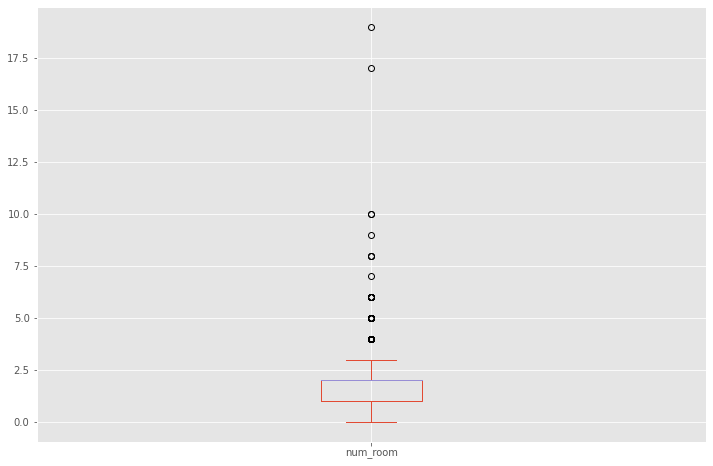

In [ ]:
df['num_room'].plot(kind="box")
## TODO...

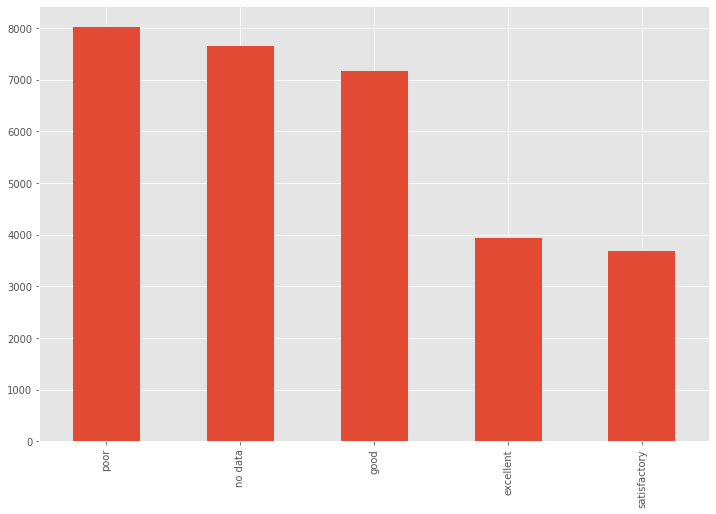

In [ ]:
df['ecology'].value_counts().plot(kind="bar")
## TODO...

### Q5. Busque instâncias duplicadas

Note que duplicatas não precisam ser idênticas em todas as dimensões, podemos ser mais espertos e selecionar um conjuntos de características-chave que indicam a ocorrência de uma duplicata.

Faça a seguir:
- Busque e remova duplicatas baseando-se em todos os atributos da base
- Busque e remova duplicatas baseando-se nos atributos-chave `{timestamp, full_sq, life_sq, floor, build_year, num_room, price_doc}`

In [ ]:
## TODO...

### Q6. Corrija inconsistências nominais

Verifique os atributos não-numéricos (variável `df_non_numeric`) e identifique dimensões que precisam ser normalizadas (ex: converter para letra minúscula, remover espaços, símbolos, etc.)

In [ ]:
## TODO...

## Conversão simbólica-numérica

### Q7. Converta os atributos nominais em numéricos 

Variável `df_non_numeric`. Utilize a(s) abordagem(ns) de sua escolha. **Justifique suas escolhas**.

In [ ]:
## TODO...

## Redução de dimensionalidade

### Q8. Confira se existe alta correlação entre atributos da base.

* Apresente a matriz de correlação 
* Localize e aponte grupos de atributos que apresentam alta correlação entre si. 
* Aproveite e imprima o top10 atributos com maior correlação (top10 positiva e top10 negativa) com a classe a ser predita, `price_doc`.

In [ ]:
## TODO...